In [1]:
# !pip install ultralytics

In [2]:
# !pip install squarify

In [2]:
# import libraries

from ultralytics import YOLO
# import ray
# from ray import tune
import squarify
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import os
import random
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')

# import warnings
%matplotlib inline


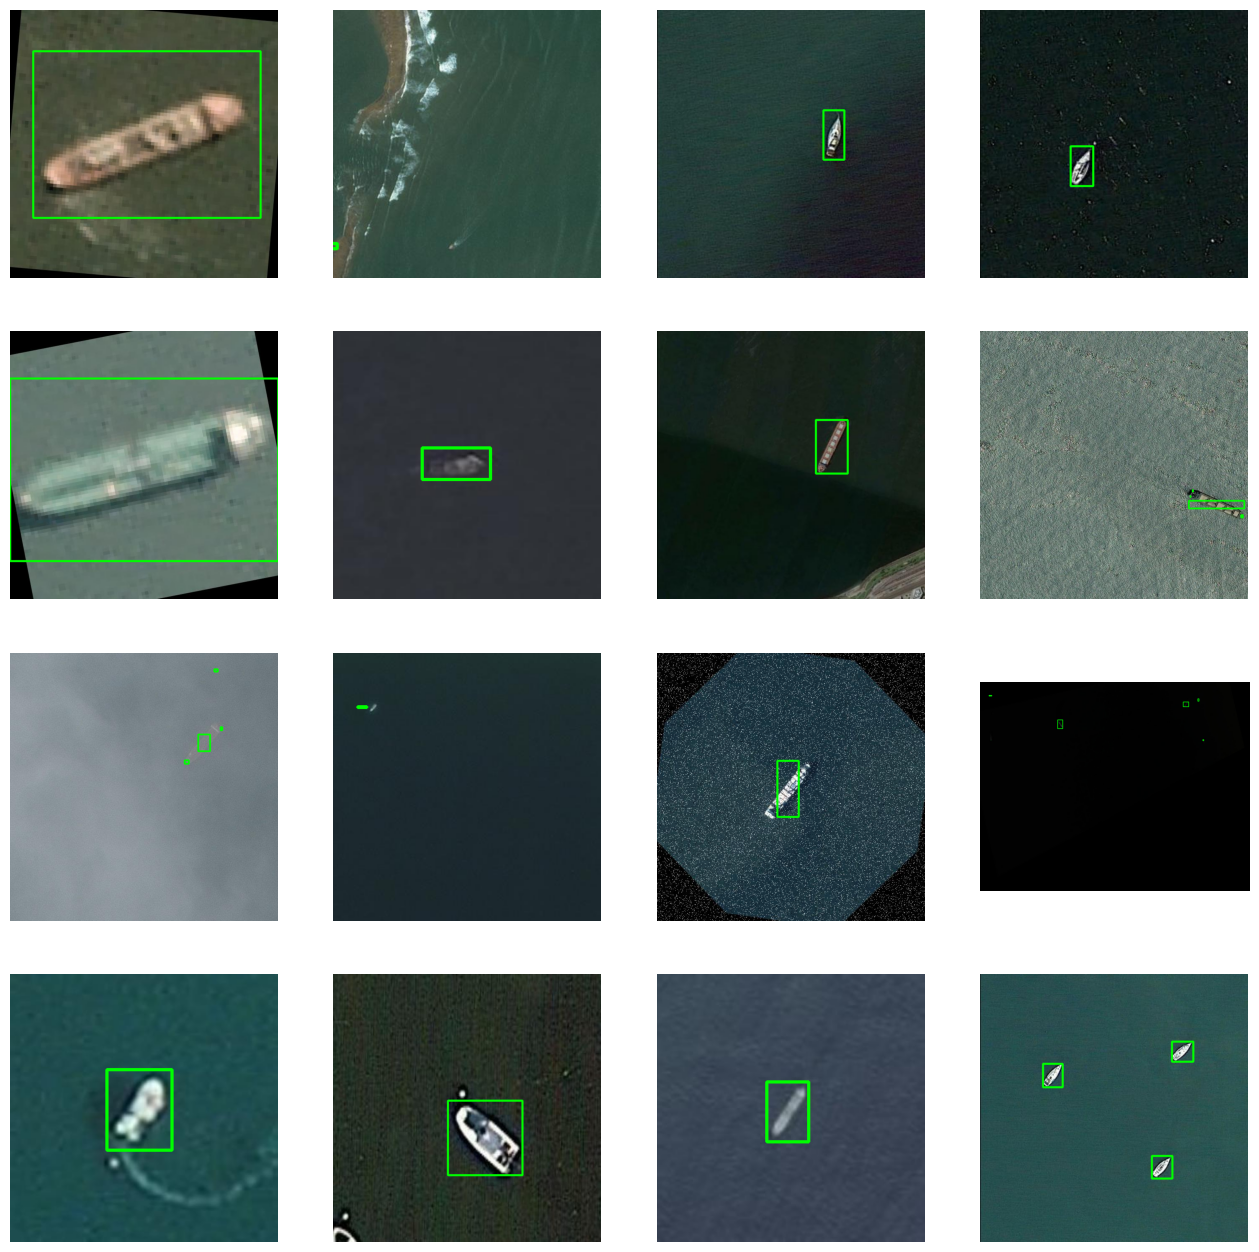

In [4]:
train_images = r"D:\yoloTest\Ship_Detection\ships-aerial-images\train\images"
val_images = r"D:\yoloTest\Ship_Detection\ships-aerial-images\valid\images"
test_images = r"D:\yoloTest\Ship_Detection\ships-aerial-images\test\images"

train_labels = r"D:\yoloTest\Ship_Detection\ships-aerial-images\train\labels"
val_labels = r"D:\yoloTest\Ship_Detection\ships-aerial-images\valid\labels"
test_labels = r"D:\yoloTest\Ship_Detection\ships-aerial-images\test\labels"

# Mendapatkan list keseluruhan gambar kapal
image_files = os.listdir(train_images)

# Pilih secara acak 16 gambar
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4
    
    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)

    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

## `Training Model`

In [7]:
dataset = r"ships-aerial-images\data.yaml"

In [4]:
model_nano = YOLO('yolov8n.yaml').load('yolov8n.pt')


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

In [8]:
model_nano.train(data=dataset,
            epochs=150,
            patience=70,
            imgsz=256,
            batch=32,
            save=True,
            workers=0,
            optimizer='Adam',
            project='Ship Detection',
            name='Second_Training_Nanopt',
            cache=True,
            device='cpu',
            exist_ok=True,
            resume=True)

Ultralytics YOLOv8.0.154  Python-3.10.0 torch-2.0.1+cpu CPU (AMD A8-6410 APU with AMD Radeon R5 Graphics)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=ships-aerial-images\data.yaml, epochs=150, patience=70, batch=32, imgsz=256, save=True, save_period=-1, cache=True, device=cpu, workers=0, project=Ship Detection, name=Second_Training_Nanopt, exist_ok=True, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=None, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torc

KeyboardInterrupt: 

## `Hyperparameter Opt`

In [8]:
# from ultralytics import YOLO
# import ray
# from ray import tune

# dataset_baru = 'D:/yoloTest/Ship_Detection/ships-aerial-images/data.yaml'
# model= YOLO("./Ship Detection/First_Training_Smallpt/weights/best.pt")

In [9]:
# result_grid = model.tune(data=dataset_baru, 
#                         gpu_per_trial=1, 
#                         imgsz=256, 
#                         batch=64, 
#                         epochs=100)

In [11]:
from ultralytics import YOLO

# Load a YOLOv8n model
model = YOLO("yolov8n.pt")

# Start tuning hyperparameters for YOLOv8n training on the COCO128 dataset
result_grid = model.tune(data="coco128.yaml")

2023-08-15 14:18:35,963	INFO wandb.py:305 -- Already logged into W&B.
2023-08-15 14:18:38,370	WARNING worker.py:2033 -- Warning: The actor ImplicitFunc is very large (24 MiB). Check that its definition is not implicitly capturing a large array or other object in scope. Tip: use ray.put() to put large objects in the Ray object store.
2023-08-15 14:18:42,121	ERROR tune_controller.py:911 -- Trial task failed for trial _tune_f2cf9_00000
Traceback (most recent call last):
  File "c:\Users\dika_atma\anaconda3\envs\yolov8\lib\site-packages\ray\air\execution\_internal\event_manager.py", line 110, in resolve_future
    result = ray.get(future)
  File "c:\Users\dika_atma\anaconda3\envs\yolov8\lib\site-packages\ray\_private\auto_init_hook.py", line 24, in auto_init_wrapper
    return fn(*args, **kwargs)
  File "c:\Users\dika_atma\anaconda3\envs\yolov8\lib\site-packages\ray\_private\client_mode_hook.py", line 103, in wrapper
    return func(*args, **kwargs)
  File "c:\Users\dika_atma\anaconda3\env